<a href="_index.ipynb">&larr; NOI </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>
# NOI: Zufallsprozesse

Dieses Notebook demonstriert verschiedene Zufallsprozesse und ihre Eigenschaften (ungefiltert und gefiltert). Es werden betrachtet

- Gaussverteilung
- Gleichförmige Verteilung
- Binomialverteilung

Die Grafiken wurden für Folien weiterverwendet und sind daher aufwändiger formatiert.

In [1]:
import os, sys
import time

module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import numpy as np
from numpy import arange, log10
from scipy.stats import norm
import scipy.signal as sig

plt.rcParams["figure.figsize"] = [15, 10]

## Random sequences ##
Mit Hilfe der `numpy` und `scipy.signal` Bibliotheken können wir leicht verschiedene Zufallssequenzen erzeugen und analysieren. Die bekannteste ist vermutlich die **Gauss** Verteilung, aber **gleichförmige** (uniform) oder **Binomial** Verteilungen kommen in Natur und Technik ebenfalls oft vor.

In [2]:
N = 10000       # number of data points
N_bins = 50     # number of bins for histograms
n = arange(N)   # array 0 ... N
t = n / N       # arr ay 0 ... 1
db_bottom = -60 # display minimum for plotting in dB
f_S = 10000       # sampling frequency; bandwidth is f_S / 2 by default
# Gaussian distribution with variance sigma and mean mu:
sigma = 0.5; mu_n = 0 
x_norm = np.random.randn(N) * sigma + mu_n
x_norm_ma = sig.lfilter(np.ones(100)/100, 1, x_norm) # Moving Average filter, L=100
x_sigma = np.arange(-4 * sigma, 4 * sigma, 0.001)
y_sigma = norm.pdf(x_sigma, mu_n, sigma)# Ideal Gaussian bell curve
# Uniform distribution in the range 0 ... Delta with mean mu:
Delta = np.sqrt(3); mu_u = -Delta/2. # range and mean
x_uniform = np.random.rand(N) * Delta + mu_u
# Binomial distribution for n_T trials and a success probability p for each trial:
n_T = 1; p = 0.5
x_binom = np.random.binomial(n_T, p, N)

Der nächste Plot zeigt ein zufälliges Signal (jedes Mal wenn Sie die vorige Zelle ablaufen lassen, ändert sich der Plot). Man sieht dem Signal an, dass die Werte nicht unabhängig von einander sind, dies wurde erreicht durch eine Tiefpassfilterung der Daten mit einem Moving Average Filter.

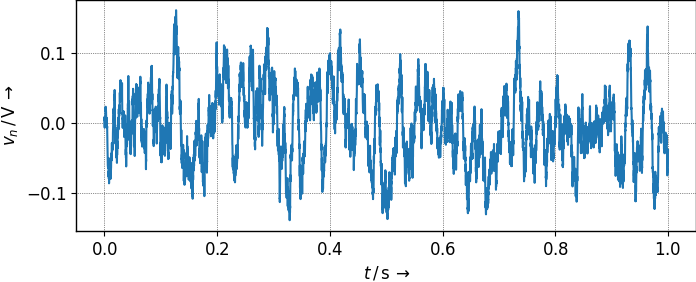

In [3]:
fig1, ax1 = plt.subplots(1, figsize=(8,3))
ax1.plot(t, x_norm_ma)
ax1.set_xlabel(r'$t \,/ \, \mathrm{s}\, \rightarrow$')
ax1.set_ylabel(r'$v_n \,/ \,\mathrm{V} \,\rightarrow$');
# fig1.savefig("random.svg", transparent=True, pad_inches=0) # optional, save to file

Auch mehr oder weniger zufällige Prozesse kann man sie mit Hilfe ihrer statistischen Parameter (Mittelwert, Varianz), ihrer Wahrscheinlichkeitsdichtefunktion (PDF, probability density function), ihrer Autokorrelationsfunktion (AKF) und des Spektrums der PDF charakterisieren. Zunächst schauen wir uns zwei verschiedene Verteilungsdichtefunktionen an, normal- oder gaussverteilte Folgen und gleichverteilte Folgen.

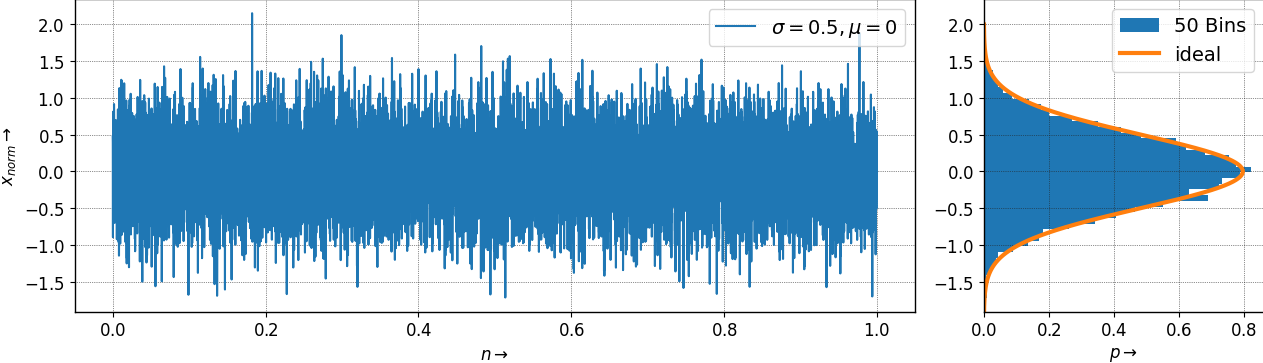

In [4]:
rnd_type = "Normal" # "Uniform", "Normal", "Binomial"
fig2 = plt.figure(figsize=(13,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax2a = plt.subplot(gs[0])
#ax2a.set_title(rnd_type + ' Distribution')
if rnd_type=='Normal':
    ax2a.plot(t, x_norm, label = r'$\sigma = {0}, \mu = {1}$'.format(sigma, mu_n))
    ax2a.set_ylabel(r'$x_{norm}\rightarrow$')
    x_rnd = x_norm
elif rnd_type=='Uniform':
    ax2a.plot(t, x_uniform, label = r'$\Delta = {0}, \mu = {1}$'.format(Delta, mu_u))
    ax2a.set_ylabel(r'$x_{uniform}\rightarrow$')
    x_rnd = x_uniform
elif rnd_type=='Binomial':
    ax2a.plot(t, x_binom, label = r'$p = {0}, n_T = {1}$'.format(p, n_T))
    ax2a.set_ylabel(r'$x_{binom}\rightarrow$')
    x_rnd = x_binom
ax2a.legend(fontsize = 14)
ax2a.set_xlabel(r'$n \rightarrow$');
ax2b= plt.subplot(gs[1])
ax2b.hist(x_rnd, bins=N_bins, range=None, density=True, align=u'mid', orientation=u'horizontal', label='{0} Bins'.format(N_bins))
if rnd_type=='Normal':
    ax2b.plot(y_sigma, x_sigma, lw=3, label="ideal")
elif rnd_type=='Uniform':
    ax2b.plot([0, 1/Delta, 1/Delta, 0],[mu_u, mu_u, Delta+mu_u,Delta+mu_u], lw=3, label="ideal")
ax2b.legend(fontsize = 14)
ax2b.set_xlabel(r'$p \rightarrow$')
ax2b.set_ylim(ax2a.get_ylim())
fig2.set_tight_layout(True);
#fig2.savefig(rnd_type + ".svg")

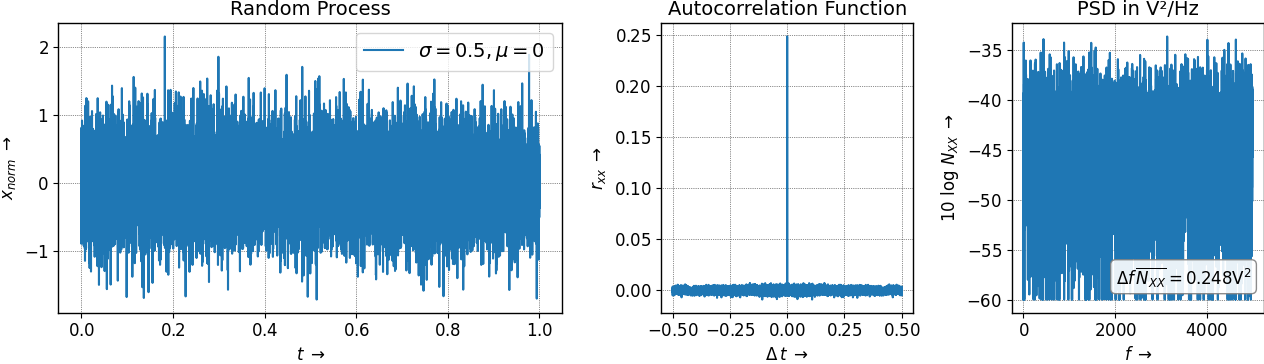

In [5]:
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9) # properties for annotation box
rnd_type = "Normal" # "Uniform", "Normal", "Binomial"
fig2 = plt.figure(figsize=(13,4))
gs = gridspec.GridSpec(1, 3, width_ratios=[2, 1, 1]) 
ax2a = plt.subplot(gs[0])
ax2a.set_title('Random Process')
if rnd_type=='Normal':
    ax2a.plot(t, x_norm, label = r'$\sigma = {0}, \mu = {1}$'.format(sigma, mu_n))
    ax2a.set_ylabel(r'$x_{norm}\; \rightarrow$')
    x_rnd = x_norm
elif rnd_type=='Uniform':
    ax2a.plot(n, x_uniform, label = r'$\Delta = {0}, \mu = {1}$'.format(Delta, mu_u))
    ax2a.set_ylabel(r'$x_{uniform}\; \rightarrow$')
    x_rnd = x_uniform
elif rnd_type=='Binomial':
    ax2a.plot(x_binom, label = r'$p = {0}, n_T = {1}$'.format(p, n_T))
    ax2a.set_ylabel(r'$x_{binom} \;\rightarrow$')
    x_rnd = x_binom
ax2a.legend(fontsize = 14)
ax2a.set_xlabel(r'$t \; \rightarrow$');
ax2b= plt.subplot(gs[1])
ax2b.set_title('Autocorrelation Function')
acf = sig.correlate(x_rnd, x_rnd, mode='same')/N
ax2b.plot(t - 0.5, acf)
ax2b.set_xlabel(r'$\Delta \, t \; \rightarrow$')
ax2b.set_ylabel(r'$r_{xx} \; \rightarrow$')
ax2b = plt.subplot(gs[2])
ax2b.set_title('PSD in V²/Hz')
f, Nxx = sig.periodogram(x_rnd, f_S)
ax2b.plot(f, np.clip(10*log10(Nxx), db_bottom, np.inf))

ax2b.annotate(r'$\Delta f\, \overline{{N_{{XX}}}} ={0:.3g}\mathrm{{V}}^2$'.format(np.mean(Nxx)*f_S/2), xy=(0.95, 0.1), 
              xycoords='axes fraction', ha='right', bbox=bbox_props)
ax2b.set_xlabel(r'$f \; \rightarrow$')
ax2b.set_ylabel(r'10 log $N_{XX}\; \rightarrow$')
fig2.set_tight_layout(True);
#fig2.savefig(rnd_type + "_acf.svg")

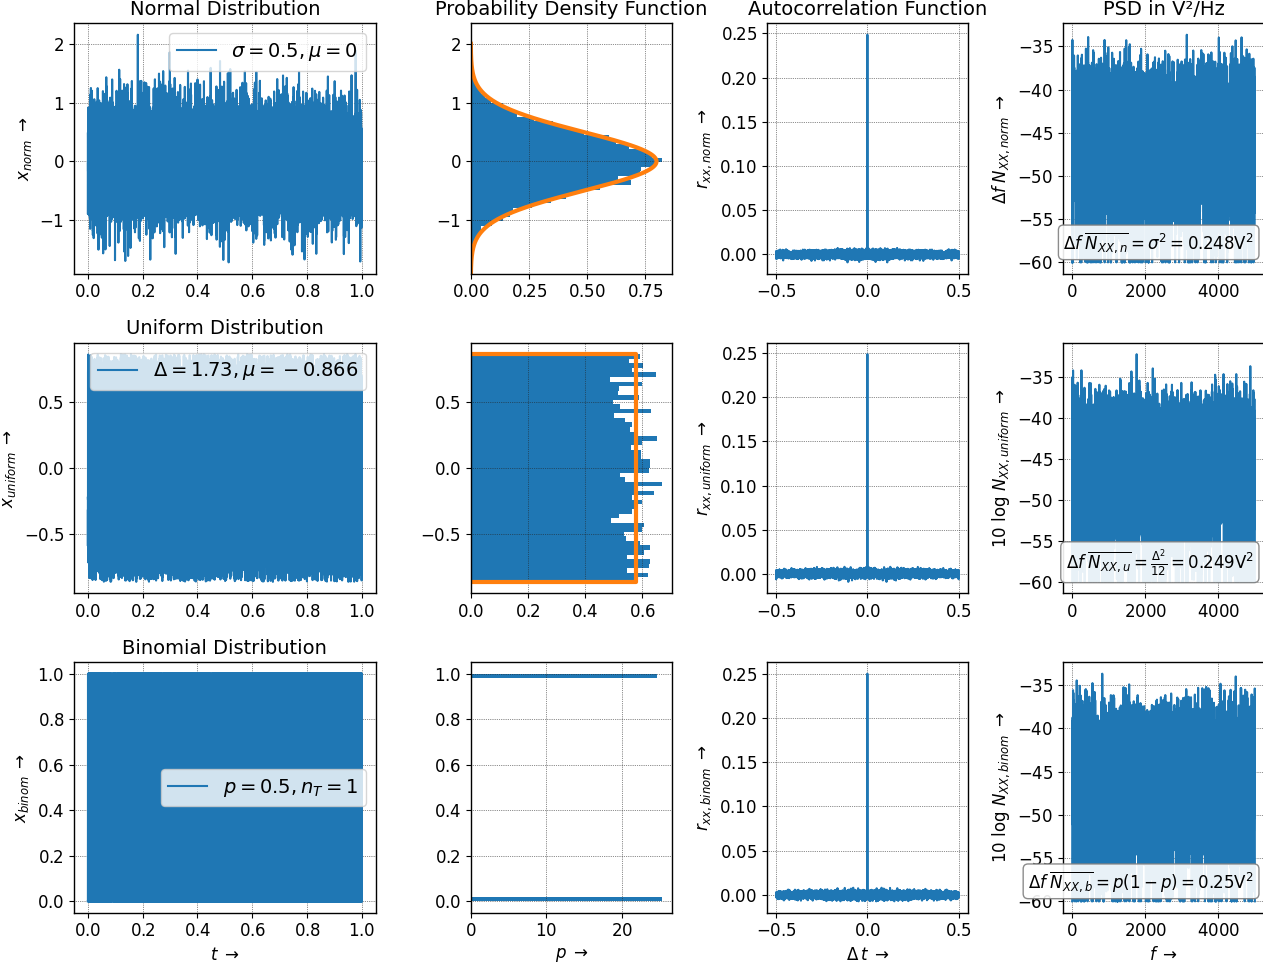

In [6]:
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9) # properties for annotation box
fig3 = plt.figure(figsize=(13,10))
gs = gridspec.GridSpec(3, 4, width_ratios=[1.5, 1, 1, 1])
ax31a = plt.subplot(gs[0])
ax31a.set_title('Normal Distribution')
ax31a.plot(t, x_norm, label = r'$\sigma = {0:.3g}, \mu = {1}$'.format(sigma, mu_n))
ax31a.legend(fontsize = 14)
ax31a.set_ylabel(r'$x_{norm}\; \rightarrow$')
ax31b = plt.subplot(gs[1])
ax31b.set_title('Probability Density Function')
ax31b.hist(x_norm, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax31b.plot(y_sigma, x_sigma, lw=3)
ax31b.set_ylim(ax31a.get_ylim())
ax31c = plt.subplot(gs[2])
ax31c.set_title('Autocorrelation Function')
acf = sig.correlate(x_norm, x_norm, mode='same')/N
ax31c.plot(t - 0.5, acf)
ax31c.set_ylabel(r'$r_{xx,norm} \; \rightarrow$')
ax31d = plt.subplot(gs[3])
ax31d.set_title('PSD in V²/Hz')
f, Nxx_n = sig.periodogram(x_norm, f_S)
ax31d.plot(f, np.clip(10*log10(Nxx_n), db_bottom, np.inf))
ax31d.annotate(r'$\Delta f \; \overline{{N_{{XX,n}}}}=\sigma^2={0:.3g}\mathrm{{V}}^2$'.format(np.mean(Nxx_n)*f_S/2), xy=(0.95, 0.1), 
              xycoords='axes fraction', ha='right',bbox=bbox_props)
ax31d.set_ylabel(r'$\Delta f\; N_{XX, norm}\; \rightarrow$')

ax32a = plt.subplot(gs[4])
ax32a.set_title('Uniform Distribution')
ax32a.plot(t, x_uniform, label = r'$\Delta = {0:.3g}, \mu = {1:.3g}$'.format(Delta, mu_u))
ax32a.legend(fontsize = 14)
ax32a.set_ylabel(r'$x_{uniform} \; \rightarrow$')
ax32b = plt.subplot(gs[5])
ax32b.hist(x_uniform, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax32b.plot([0, 1/Delta, 1/Delta, 0],[mu_u, mu_u, Delta+mu_u,Delta+mu_u], lw=3)
ax32b.set_ylim(ax32a.get_ylim())
ax32c = plt.subplot(gs[6])
acf = sig.correlate(x_uniform, x_uniform, mode='same')/N
ax32c.plot(t - 0.5, acf)
ax32c.set_ylabel(r'$r_{xx,uniform} \; \rightarrow$')
ax32d = plt.subplot(gs[7])
f, Nxx_u = sig.periodogram(x_uniform, f_S)
ax32d.plot(f, np.clip(10*log10(Nxx_u), db_bottom, np.inf))
ax32d.annotate(r'$\Delta f\; \overline{{N_{{XX,u}}}}=\frac{{\Delta^2}}{{12}}={0:.3g}\mathrm{{V}}^2$'.
              format(np.mean(Nxx_u)*f_S/2), xy=(0.95, 0.1), xycoords='axes fraction', ha='right',bbox=bbox_props)
ax32d.set_ylabel(r'10 log $N_{XX, uniform} \; \rightarrow$')
#
ax33a = plt.subplot(gs[8])
ax33a.set_title('Binomial Distribution')
ax33a.plot(t, x_binom, label = r'$p = {0}, n_T = {1}$'.format(p, n_T))
ax33a.set_xlabel(r'$t \; \rightarrow$')
ax33a.set_ylabel(r'$x_{binom} \; \rightarrow$')
ax33a.legend(fontsize = 14)
ax33b = plt.subplot(gs[9])
ax33b.hist(x_binom, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax33b.set_xlabel(r'$p \; \rightarrow$')
ax33b.set_ylim(ax33a.get_ylim())
ax33c = plt.subplot(gs[10])
acf = sig.correlate(x_binom - 0.5, x_binom -0.5, mode='same')/N # need to remove DC component
ax33c.plot(t - 0.5, acf)
ax33c.set_xlabel(r'$\Delta \, t \;\rightarrow$')
ax33c.set_ylabel(r'$r_{xx,binom} \; \rightarrow$')

ax33d = plt.subplot(gs[11])
f, Nxx_b = sig.periodogram(x_binom, f_S)
ax33d.plot(f, np.clip(10*log10(Nxx_b), db_bottom, np.inf))
ax33d.annotate(r'$\Delta f\;\overline{{N_{{XX,b}}}}=p(1-p)={0:.3g}\mathrm{{V}}^2$'.format(np.mean(Nxx_b)*f_S/2), xy=(0.95, 0.1), 
              xycoords='axes fraction', ha='right',bbox=bbox_props)
ax33d.set_xlabel(r'$f \; \rightarrow$')
ax33d.set_ylabel(r'10 log $N_{XX, binom}\; \rightarrow$')

fig3.set_tight_layout(True)
# fig3.savefig("white_noise.svg")

Wenn man Zufallsprozesse tiefpassfiltert, konzentriert sich die Energie stärker um den Mittelwert. Die AKF verbreitert sich und deren Spektrum ist dementsprechend nicht mehr weiß:

In [7]:
x_rnd = x_norm # x_norm, x_uniform, x_binom
b, a = sig.iirfilter(6, [0.05], rs=60, rp=0.1, btype='lowpass', ftype='butter') # define IIR filter with f_c = 0.005 f_S
x_rnd_filt = sig.lfilter(b, a, x_rnd)

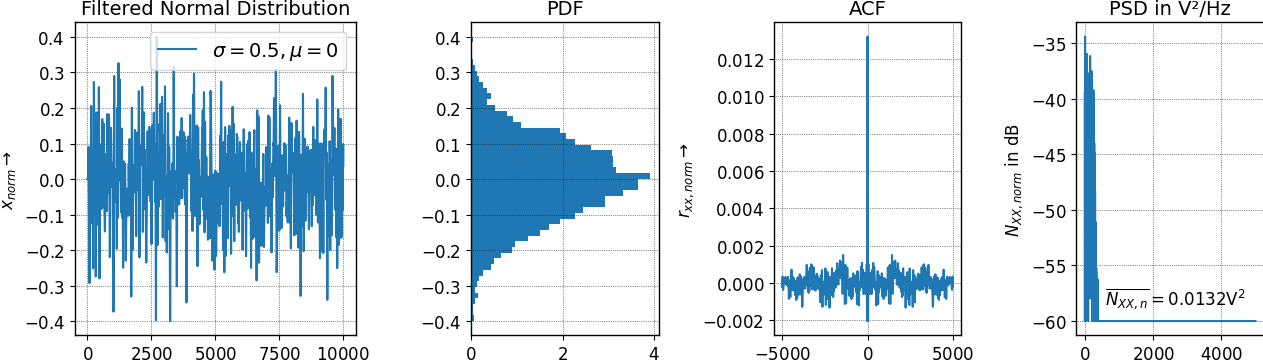

In [8]:
fig4 = plt.figure(figsize=(13,4))
gs = gridspec.GridSpec(1, 4, width_ratios=[1.5, 1, 1, 1])
ax4a = plt.subplot(gs[0])
ax4a.set_title('Filtered Normal Distribution')
ax4a.plot(n, x_rnd_filt, label = r'$\sigma = {0}, \mu = {1}$'.format(sigma, mu_n))
ax4a.legend(fontsize = 14)
ax4a.set_ylabel(r'$x_{norm}\rightarrow$')
ax4b = plt.subplot(gs[1])
ax4b.set_title('PDF')
ax4b.hist(x_rnd_filt, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax4b.set_ylim(ax4a.get_ylim())
ax4c = plt.subplot(gs[2])
ax4c.set_title('ACF')
acf = sig.correlate(x_rnd_filt, x_rnd_filt, mode='same')/N
ax4c.plot(n-N/2, acf)
ax4c.set_ylabel(r'$r_{xx,norm} \rightarrow$')
ax4d = plt.subplot(gs[3])
ax4d.set_title('PSD in V²/Hz')
f, Nxx_n = sig.periodogram(x_rnd_filt, f_S)
ax4d.plot(f, np.clip(10*log10(Nxx_n), db_bottom, np.inf))
ax4d.annotate(r'$\overline{{N_{{XX,n}}}}={0:.3g}\mathrm{{V}}^2$'.format(np.mean(Nxx_n)*f_S/2), xy=(0.9, 0.1), 
              xycoords='axes fraction', ha='right')
ax4d.set_ylabel(r'$N_{XX, norm}$ in dB')
fig4.tight_layout()

Durch lineare Tiefpassfilterung nähert sich die PDF von Zufallsprozessen einer Gaussverteilung. Das kann man interpretieren als ein Beispiel für den zentralen Grenzwertsatz der Statistik (die Überlagerung von vielen Zufallsprozessen nähert sich immer mehr einer Normalverteilung an), da ein Tiefpassfilter zeitverschobene und skalierte Kopien des Eingangssignals aufsummiert.

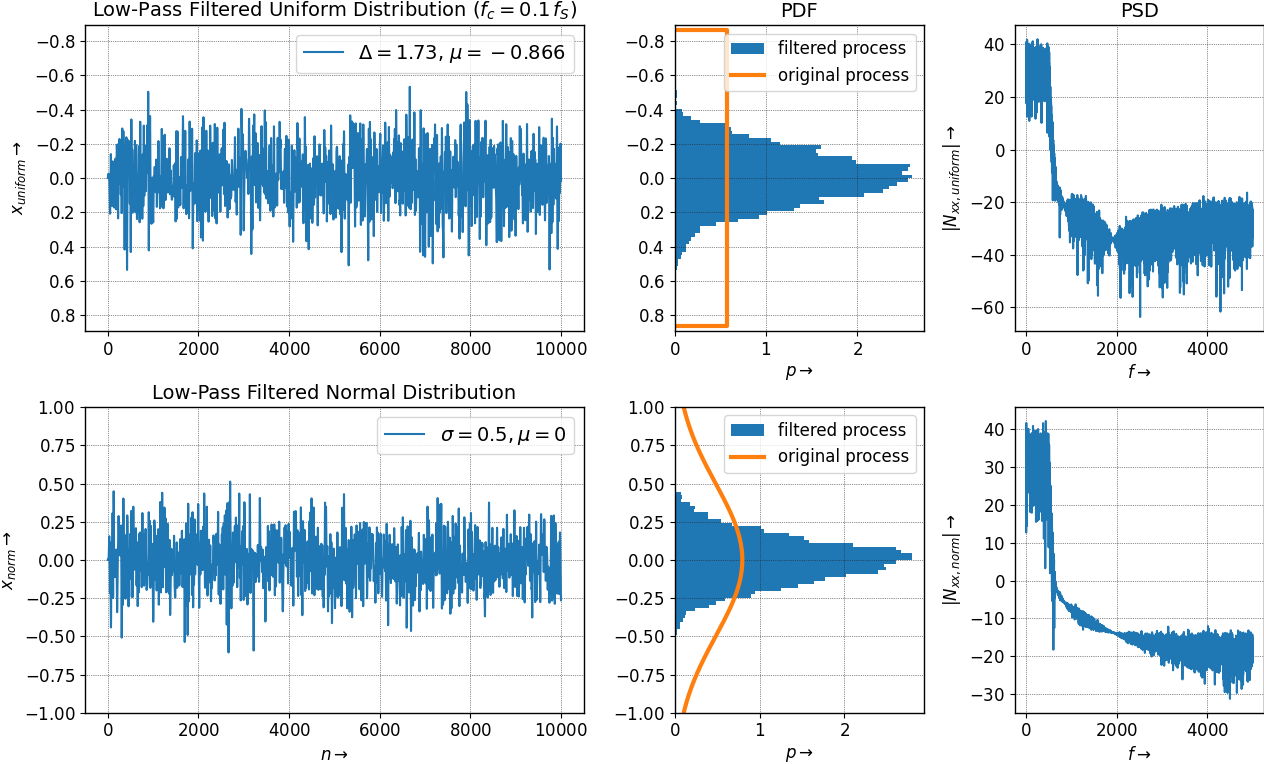

In [9]:
# x_norm, x_uniform, x_binom
b, a = sig.iirfilter(6, [0.1], rs=60, rp=1, btype='lowpass', ftype='ellip') # define filter
x_uniform_filt = sig.lfilter(b, a, x_uniform)
x_norm_filt = sig.lfilter(b, a, x_norm)
fig5 = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1, 1]) 
ax51a = plt.subplot(gs[0])
ax51a.set_title('Low-Pass Filtered Uniform Distribution ($f_c = {0}\, f_S$)'.format(0.1))
ax51a.plot(n, x_uniform_filt, label = r'$\Delta = {0:.3g}$, $\mu = {1:.3g}$'.format(Delta, mu_u))
ax51a.legend(fontsize = 14)
ax51a.set_ylabel(r'$x_{uniform} \rightarrow$')
ax51a.set_ylim((Delta+mu_u)*1.03, mu_u*1.03)
ax51b = plt.subplot(gs[1])
ax51b.hist(x_uniform_filt, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label="filtered process")
# ax51b.plot([0, 1/Delta, 1/Delta, 0],[0,0,Delta,Delta]) # Binomial Distribution
ax51b.plot([0, 1/Delta, 1/Delta, 0],[mu_u, mu_u, Delta+mu_u,Delta+mu_u], lw=3, label="original process")
ax51b.set_title(r'PDF')
ax51b.set_xlabel(r'$p \rightarrow$')
ax51b.set_ylim(ax51a.get_ylim())
ax51b.legend()
ax51c = plt.subplot(gs[2])
ax51c.plot(20*np.log10(np.abs(np.fft.fft(x_uniform_filt)[:N//2])))
ax51c.set_title('PSD')
ax51c.set_xlabel(r'$f \rightarrow$')
ax51c.set_ylabel(r'$|N_{xx,uniform}|\rightarrow$')
#
ax54 = plt.subplot(gs[3])
ax54.set_title('Low-Pass Filtered Normal Distribution')
ax54.plot(n, x_norm_filt, label = r'$\sigma = {0:.3g}, \mu = {1:.3g}$'.format(sigma, mu_n))
ax54.legend(fontsize = 14)
ax54.set_xlabel(r'$n \rightarrow$');
ax54.set_ylabel(r'$x_{norm}\rightarrow$')
ax54.set_ylim([-2 * sigma, 2 * sigma])
ax55 = plt.subplot(gs[4])

ax55.hist(x_norm_filt, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label="filtered process")
ax55.plot(y_sigma, x_sigma, lw=3, label="original process")
ax55.set_xlabel(r'$p \rightarrow$')
ax55.set_ylim(ax54.get_ylim())
ax55.legend()
ax56 = plt.subplot(gs[5])
ax56.plot(20*np.log10(np.abs(np.fft.fft(x_norm_filt)[:N//2])))
ax56.set_xlabel(r'$f \rightarrow$')
ax56.set_ylabel(r'$|N_{xx,norm}|\rightarrow$')
#
fig5.tight_layout()

***
### Copyright

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2021*.